[4604.128772937865, 23350.71688860395, 64166.27003075577, 138898.2743150863, 299253.1984366621, 412370.92522751936, 413200]
42121.94459500065
67989.03085804352
54141.760183182465
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.3325636491454012
            Iterations: 7
            Function evaluations: 60
            Gradient evaluations: 7
0.268
0.431
0.213
0.066
0.011
0.005
0.006


/tmp/ipykernel_13483/3783419667.py:6: RuntimeWarning: divide by zero encountered in log
  return -sum([prob * np.log(prob) for prob in probs])
/tmp/ipykernel_13483/3783419667.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return -sum([prob * np.log(prob) for prob in probs])


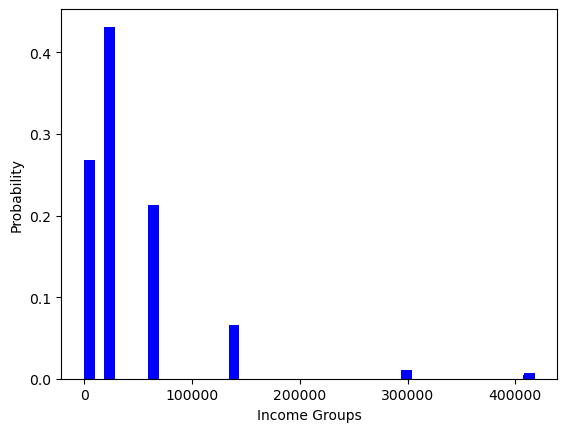

In [11]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def entropy(probs):
    return -sum([prob * np.log(prob) for prob in probs])

def objective_func(probs, sign=1.0):
    '''
    The objective function to be used in numpy minimze.
    '''
    return sign * entropy(probs)

def compute_probabilities(cons, size):


    # scipy requires a starting position to compute the values.
    # We can start from a fair dice
    start_pos = ptrues #np.ones(6)*(1/6.)

    # we want to make sure all the solutions are in the range of [0, 1]
    bnds = tuple((0,1) for x in range(0, size))

    # call scipy minimize to find the solution and return all the information
    # - the args = (-1.0) passes the sign to the objective function
    # - we are going to use the Sequential Least Square Programming
    # - we would like to see the detailed information about number of iterations
    return minimize(objective_func, start_pos, args=(-1.0,),
                    constraints=cons, method='SLSQP', bounds=bnds, options={'disp': True})

def compute_random_average(low, high, samples):
    samples=int(samples) #define samples as integers
    dist = np.random.uniform(low, high, size=samples)
    noise = np.random.normal(0, 3, samples)
    for i in range(0, len(dist)):
        dist[i] = dist[i] + noise[i]
    return np.average(dist)

def expected_value(probs, values):
    s = 0
    for i in range(0, len(probs)):
        s += probs[i] * values[i]
    return s

total_population = 100000

ptrues = [0.271, 0.418, 0.237, 0.046, 0.018, 0.002, 0.008]

population_per_bracket = [ptrue * total_population for ptrue in ptrues]

x1 = [compute_random_average(     0,   9225, population_per_bracket[0]),
      compute_random_average(  9225,  37450, population_per_bracket[1]),
      compute_random_average( 37450,  90750, population_per_bracket[2]),
      compute_random_average( 90750, 189300, population_per_bracket[3]),
      compute_random_average(189300, 411500, population_per_bracket[4]),
      compute_random_average(411500, 413200, population_per_bracket[5]),
      413200]

x2 = [compute_random_average(     0,  18450, population_per_bracket[0]),
      compute_random_average( 18450,  74900, population_per_bracket[1]),
      compute_random_average( 74900, 151200, population_per_bracket[2]),
      compute_random_average(151200, 230450, population_per_bracket[3]),
      compute_random_average(230450, 411500, population_per_bracket[4]),
      compute_random_average(411500, 464850, population_per_bracket[5]),
      464850]

x3 = [compute_random_average(     0,  13150, population_per_bracket[0]),
      compute_random_average( 13150,  50200, population_per_bracket[1]),
      compute_random_average( 50200, 129600, population_per_bracket[2]),
      compute_random_average(129600, 209850, population_per_bracket[3]),
      compute_random_average(209850, 411500, population_per_bracket[4]),
      compute_random_average(411500, 439000, population_per_bracket[5]),
      439000]

expected_x1 = expected_value(ptrues, x1)
expected_x2 = expected_value(ptrues, x2)
expected_x3 = expected_value(ptrues, x3)

print(x1)
print(expected_x1)
print(expected_x2)
print(expected_x3)


# cons1 = ({'type': 'eq', 'fun': lambda p:  1 - sum(p)},
#         {'type': 'eq', 'fun': lambda p: sum([p[i] * x1[i] for i in range(0, len(x1))]) - expected_x1})

# cons2 = ({'type': 'eq', 'fun': lambda p:  1 - sum(p)},
#         {'type': 'eq', 'fun': lambda p: sum([p[i] * x1[i] for i in range(0, len(x1))]) - expected_x2})

cons3 = ({'type': 'eq', 'fun': lambda p:  1 - sum(p)},
          {'type': 'eq', 'fun': lambda p: sum([p[i] * x1[i] for i in range(0, len(x1))]) - expected_x1},
          {'type': 'eq', 'fun': lambda p: sum([p[i] * x2[i] for i in range(0, len(x2))]) - expected_x2},
         {'type': 'eq', 'fun': lambda p: sum([p[i] * x3[i] for i in range(0, len(x3))]) - expected_x3})


probs = compute_probabilities(cons3, len(x1)).x
for prob in probs:
    print('{0:.3f}'.format(prob))

x = np.array(sorted(x1))
y = np.array(probs)
bar_width = 10000
plt.bar(x, y, bar_width, alpha=1.0, color='b')
plt.xlabel("Income Groups")
plt.ylabel("Probability")
plt.show()
